In [1]:
# Core scverse libraries
import scanpy as sc
import anndata as ad

In [2]:
sc.settings.set_figure_params(dpi=50, facecolor="white")

In [3]:
adata = ad.read_h5ad("/home/users/kzlin/kzlinlab/data/larry_hematopoiesis_pyro-velocity/larry.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 49302 × 23420
    obs: 'Library', 'Cell barcode', 'time_info', 'Starting population', 'state_info', 'Well', 'SPRING-x', 'SPRING-y'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'data_des'
    obsm: 'X_clone', 'X_emb'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [5]:
adata.X[0:9,0:9].todense()

matrix([[0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [6]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

In [7]:
adata

AnnData object with n_obs × n_vars = 49302 × 14647
    obs: 'Library', 'Cell barcode', 'time_info', 'Starting population', 'state_info', 'Well', 'SPRING-x', 'SPRING-y', 'n_genes'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells'
    uns: 'data_des'
    obsm: 'X_clone', 'X_emb'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [8]:
# Saving count data
adata.layers["counts"] = adata.X.copy()

In [9]:
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

In [11]:
sc.pp.highly_variable_genes(adata, 
                            n_top_genes=2000, 
                            subset=True)

/home/users/kzlin/miniconda3/envs/scVI/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


In [12]:
sc.tl.pca(adata)

In [13]:
sc.pp.neighbors(adata)

/home/users/kzlin/miniconda3/envs/scVI/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
sc.tl.umap(adata)

/home/users/kzlin/miniconda3/envs/scVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/users/kzlin/miniconda3/envs/scVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


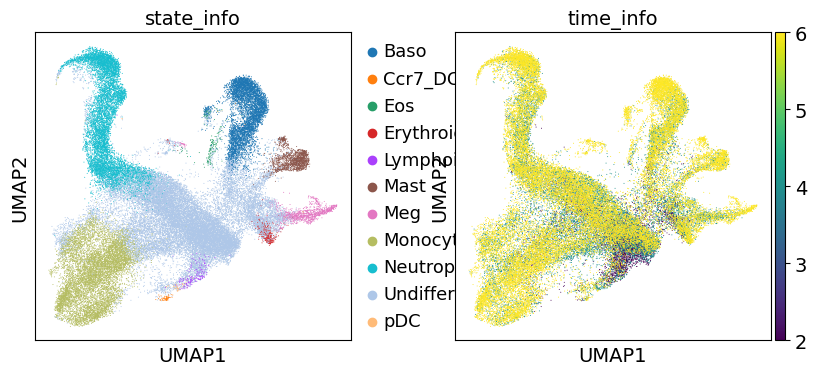

In [15]:
sc.pl.umap(
    adata,
    color=["state_info", "time_info"],
    size=2,
)